simple xor learning with keras

https://gist.github.com/stewartpark/187895beb89f0a1b3a54

In [1]:
import tensorflow as tf
print(tf.__file__)


C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\__init__.py


In [1]:
%config IPCompleter.use_jedi=False
%config IPCompleter.use_matplotlib=False
%config IPCompleter.greedy=True

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3284: UserWarning: Config option `use_matplotlib` not recognized by `IPCompleter`.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
import os

os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'

In [ ]:
%pip install tensorflow

In [ ]:
!pip install keras tensorflow

In [2]:
from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow as tf #20231213
import numpy as np 

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
##兩種 y 都可以
y = np.array([[0],[1],[1],[0]])
#y = np.array([[0,1,1,0]])

In [4]:
model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [5]:
#sgd = SGD(lr=0.1)
sgd = SGD(learning_rate=0.1)
#model.compile(loss='binary_crossentropy', optimizer=sgd)
#metrics度量方法
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [6]:
# Check shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4, 2)
Shape of y: (4, 1)


In [7]:
# Ensure both arrays have the same number of samples
assert X.shape[0] == y.shape[0], "Number of samples in X and y must be the same"

In [8]:
#batch_size 批次訓練
#verbose 0=false, 1=true
#model.fit(X, y, show_accuracy=True, batch_size=1, nb_epoch=1000)
model.fit(X, y, batch_size=1, epochs=1000, verbose=0)

In [9]:
#print(model.predict_proba(X))
model.predict(X)
"""
[[ 0.0033028 ]
 [ 0.99581173]
 [ 0.99530098]
 [ 0.00564186]]
"""

1/1 [==============================] - 0s 72ms/step


'\n[[ 0.0033028 ]\n [ 0.99581173]\n [ 0.99530098]\n [ 0.00564186]]\n'

In [10]:
y_class = [round(x[0]) for x in model.predict(X)]
print(f'class = {y_class}')

1/1 [==============================] - 0s 22ms/step
class = [0, 1, 1, 0]


# Chapter 2: Training Simple Machine Learning Algorithms for Classification

come from: https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch02

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
#import numpy as np

In [15]:
from matplotlib.colors import ListedColormap

In [16]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

704/704 [==============================] - 1s 1ms/step


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

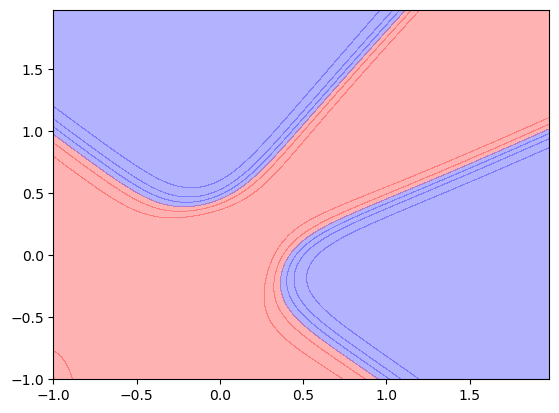

In [17]:
plot_decision_regions(X,y,model)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


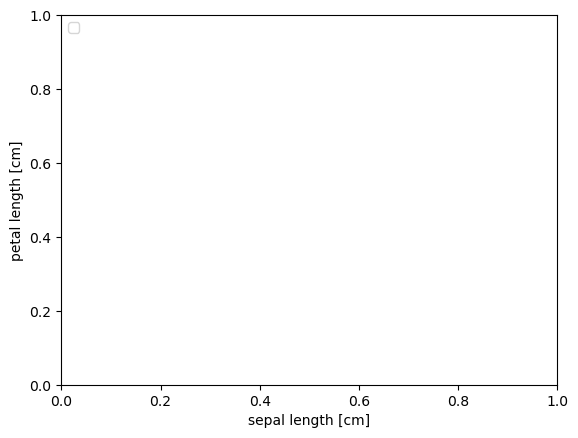

In [18]:
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

704/704 [==============================] - 1s 1ms/step


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

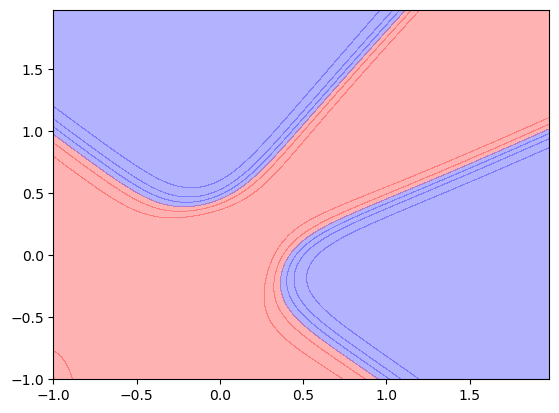

In [19]:
plot_decision_regions(X,y,model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()